<a href="https://colab.research.google.com/github/pushpjeetcholkar/machinelearning/blob/main/KMeans_by_Pushpjeet_Cholkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Understanding K-Means Alogorithm step by step by Pushpjeet Cholkar**

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Why?

•	numpy → math & vectors

•	matplotlib → visualization (VERY important for K-Means)

•	make_blobs → generate dummy clustered data


In [84]:
# Step 1 Generated Unlabled Data (Unsupervised!)
X,y = make_blobs(n_samples=6000, centers=4, n_features=2, random_state=42)
print(X)

[[-2.36831138  7.24584676]
 [-0.08248114  9.44724595]
 [-6.63782512 -6.57870252]
 ...
 [-7.76496117  8.19309543]
 [-6.14772912 -5.62559089]
 [ 4.78924232  2.33730998]]


Important logic
•	X → input data (this is what K-Means uses)
•	y → true labels (NOT used in training)
•	We keep y only for later comparison
🔴 K-Means is UNSUPERVISED → labels are ignored


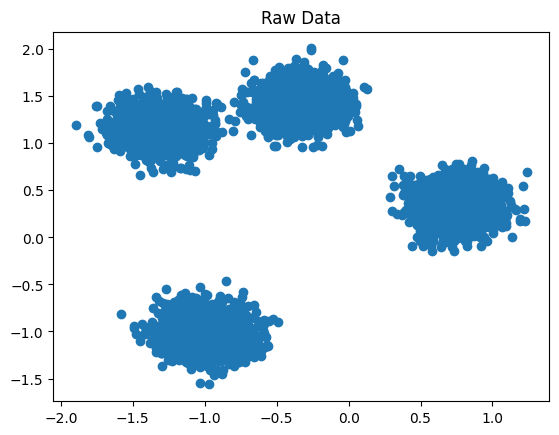

In [97]:
#  Step 2: Visualize Raw Data (before clustering)
plt.scatter(X[:,0],X[:,1])
plt.title("Raw Data")
plt.show()

**Why?**
Students must see the problem before solving it.


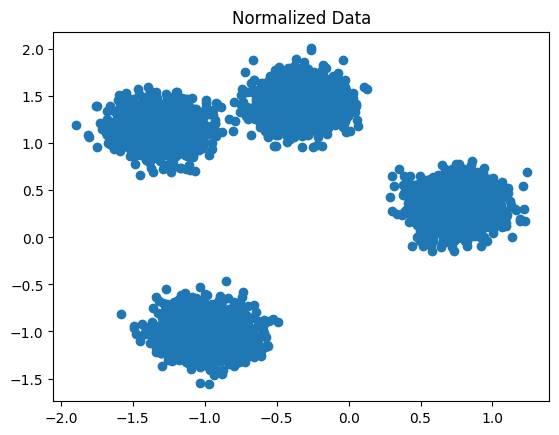

In [86]:
# Step 3: Normalize the Data (critical but often ignored)
X=(X-X.mean())/X.std()
plt.scatter(X[:,0],X[:,1])
plt.title("Normalized Data")
plt.show()

**Logic (very important)**

•	Distance is the core of K-Means

•	Features with large scale dominate distance

•	Normalization ensures fair contribution

🔴 Without normalization, K-Means gives WRONG clusters.

**Why Normalization Fixes This**

Normalization rescales features so that:

All features are on comparable scales

No single feature dominates distance

K-Means treats each feature fairly


In [87]:
# Step 4: Choose K (number of clusters)
k=4
colors =['r','g','b','y','m']

[ 0.43428511 -0.44791618]
[ 0.85624002 -0.01563655]
[0.61730978 0.11049185]
[-0.14228451  0.5282111 ]


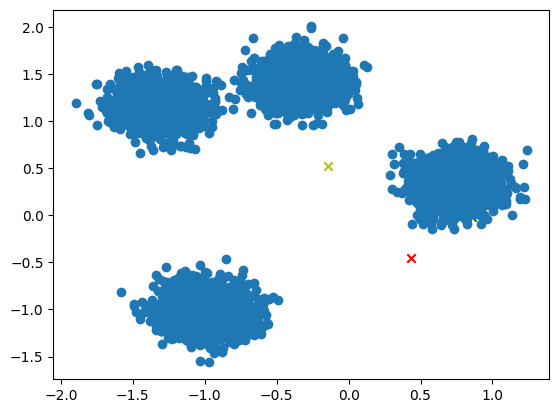

In [98]:
# Step 5: Initialize Centroids (Randomly)
centroids={}
for i in range(k):
  center = 2*np.random.rand(2)-1   # for range[-1,1]
  centroids[i] = {
      'center':center,
      'points':[],
      "color":colors[i]
  }
  print(center)
  plt.scatter(center[0],center[1],color=colors[i],marker='x')

plt.scatter(X[:,0],X[:,1])
plt.show()

**Logic behind this**

•	Each centroid has:

o	center → location

o	points → assigned data

o	color → visualization only

•	Random init = algorithm may give different results

🔴 **Bad initialization** = bad clustering (very important lesson)


**Conceptual clarity**

•	K is decided by you

•	Algorithm does NOT tell you K

•	Wrong K → wrong clustering


In [79]:
# Step 6: Distance Function (Euclidean)
def euclidean_distance(p,q):
  return np.sqrt(np.sum((p-q)**2))

**Why this works**

•	Measures straight-line distance

•	Core idea: nearest centroid wins


In [93]:
# Step 7: Step-2A → Assign Points to Nearest Centroid
def assign_points_to_cluster(X,centroids):
  for c in centroids:
    centroids[c]["points"]=[]  # clear old points

  for x in X:
    distances=[]
    for c in centroids:
      dist = euclidean_distance(x,centroids[c]["center"])
      distances.append(dist)

    cluster_id =np.argmin(distances)
    centroids[cluster_id]["points"].append(x)

**What’s happening logically**

For each data point:

1.	Compute distance  of every point with centroid

2.	Pick the nearest centroid from the point

3.	Assign point to that nearest cluster

**🔴 Hard clustering** → one point → one cluster only


In [81]:
# Step 8: Step-2B → Update Centroids (Mean of Points)
def update_centroids(centroids):
  for c in centroids:
    points=np.array(centroids[c]["points"])
    if len(points)>0:
      centroids[c]["center"]=points.mean(axis=0)


**Mathematical meaning**
•	New centroid = mean of assigned points

•	This is why it’s called  **K-MEANS**

🔴 If no points → centroid does NOT move (bad init case)


In [82]:
# Step 9: Visualization Function (very important)
def plot_clusters(centroids):
    for c in centroids:
        points = np.array(centroids[c]["points"])
        if len(points) > 0:
            plt.scatter(points[:,0], points[:,1], color=centroids[c]["color"])

        center = centroids[c]["center"]
        plt.scatter(center[0], center[1], color='black', marker='X')

    plt.show()


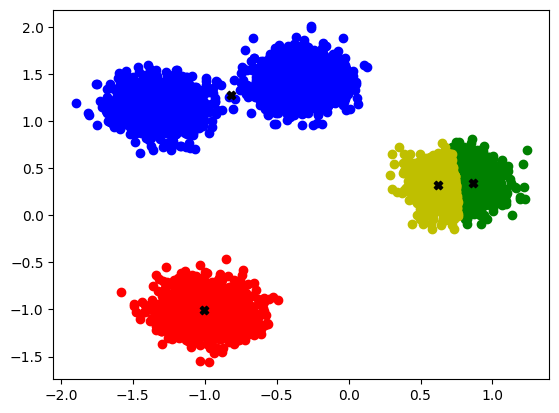

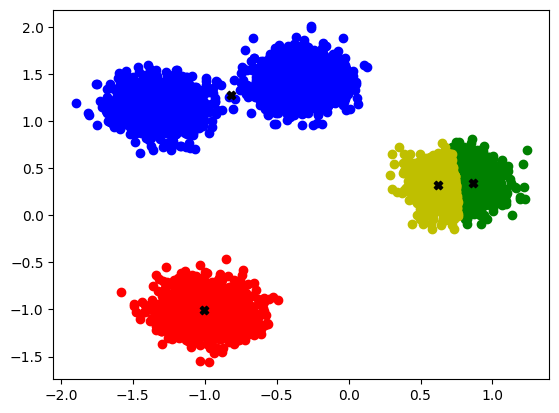

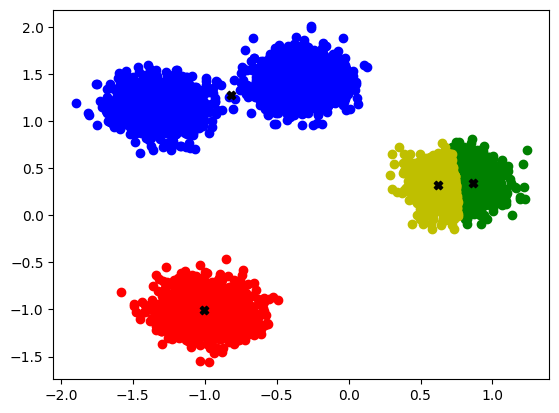

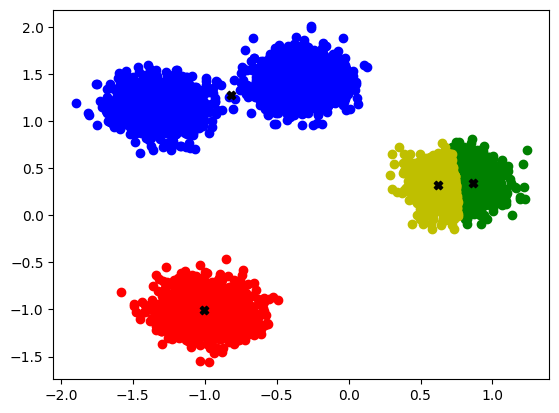

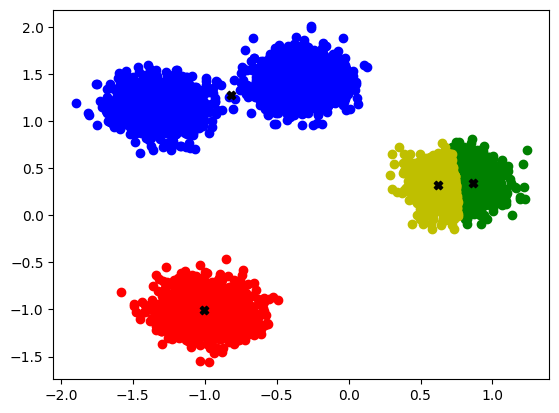

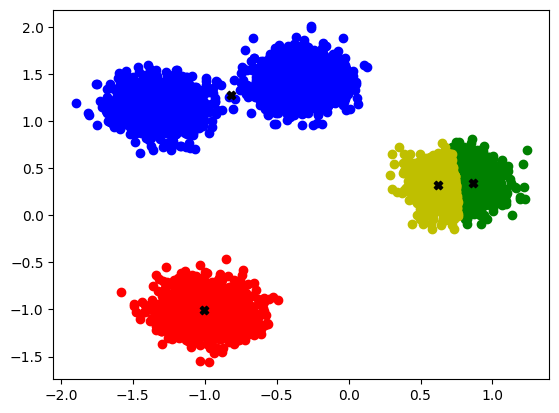

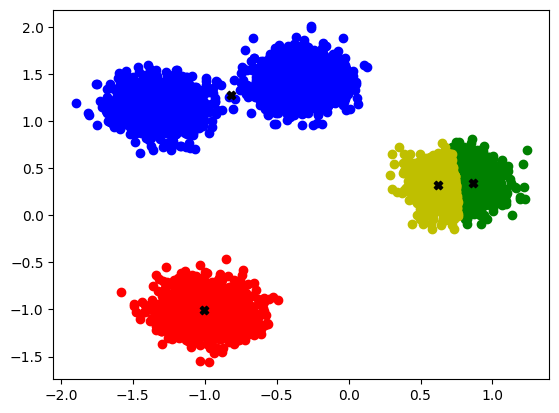

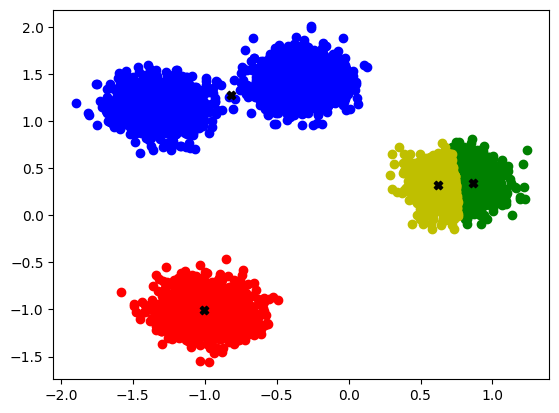

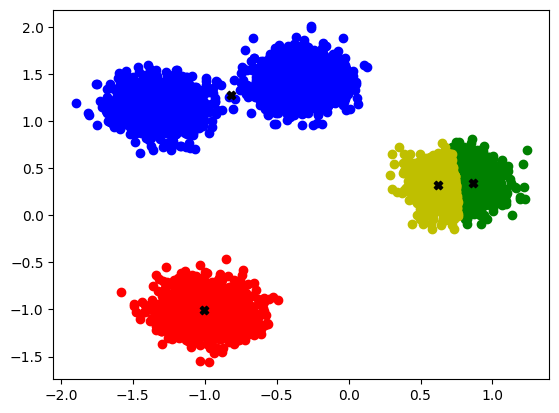

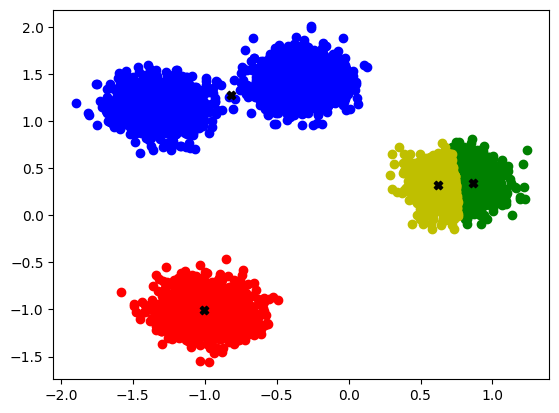

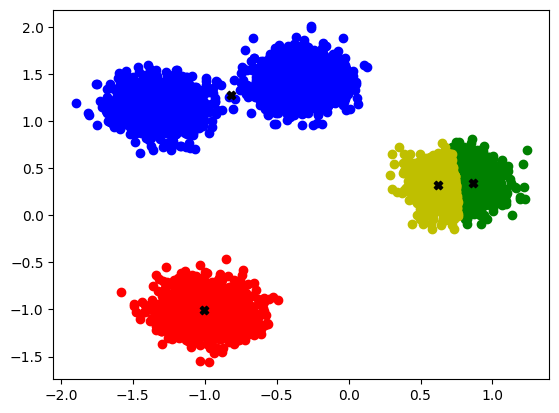

In [96]:
# Step 10: Run K-Means Iteratively
for i in range(10):
    assign_points_to_cluster(X, centroids)
    plot_clusters(centroids) # Uncommented to show progress
    update_centroids(centroids)

# Plot the final clusters after all iterations
plot_clusters(centroids)